# Data Project - The Relation between Threatened Species and Climate Change in NSW
### Jay Hong z5305785
Database of 915 threatened species and 108 threatened ecological communities in NSW with information on distribution, habitat, threat status, year of gazettal under Threatened Species Conservation Act and key threats.

The International Union for Conservation of Nature Red List of Threatened Species 
- Vulnerable, Endangered, Critically Endangered

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (10, 5)

In [5]:
saved_style_state = matplotlib.rcParams.copy() #a style state to go back to

In [6]:
import pandas as pd

df = pd.read_excel('vdatadatabasefinal2017updates.xlsx', sheet_name = 1)
df.head()
df.columns = df.columns.str.replace(' ','_')
df.rename(columns={"no._threats": "number_threats"}, inplace = True)

print("done")

done


In [7]:
df.head(3)

,Name,Common_name,Species/Ecological_Community,Type_of_Species/Ecological_Community_(For_analyses),Type_of_Species/Ecological_Community_(detailed),Growth_Form_(plants),Family,Level_of_threat,How_listed,Year_listed,...,Unnamed:_189,Unnamed:_190,Unnamed:_191,Unnamed:_192,Unnamed:_193,Unnamed:_194,Unnamed:_195,Unnamed:_196,Unnamed:_197,Unnamed:_198
0,Acacia atrox Kodela,Myall Creek Wattle,Species,Plant,Vascular Plant (Angiosperm),Shrub,Fabaceae,Endangered,NSW Scientific Committee determination,2001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acacia ausfeldii Regel.,Ausfeld's Wattle,Species,Plant,Vascular Plant (Angiosperm),Shrub,Fabaceae,Vulnerable,NSW Scientific Committee determination,2007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Acacia bakeri Maiden,Marblewood,Species,Plant,Vascular Plant (Angiosperm),Tree,Fabaceae,Vulnerable,NSW Scientific Committee determination,2001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


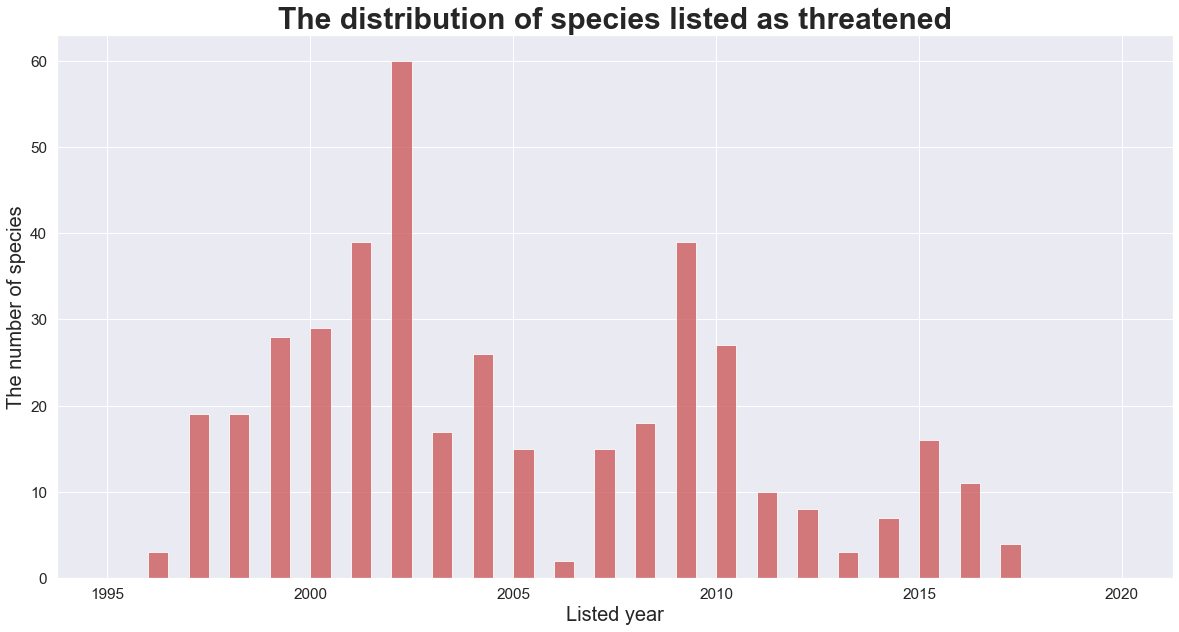

In [141]:
distribution()

In [8]:
names = df["Name"]
names.head()

0          Acacia atrox Kodela
1      Acacia ausfeldii Regel.
2         Acacia bakeri Maiden
3       Acacia bynoeana Benth.
4    Acacia chrysotricha Tind.
Name: Name, dtype: object

In [9]:
levels = df["Level_of_threat"]
levels.head()

0    Endangered
1    Vulnerable
2    Vulnerable
3    Endangered
4    Endangered
Name: Level_of_threat, dtype: object

In [10]:
name_level = df[["Name", "Level_of_threat"]]
name_level.head(5)

,Name,Level_of_threat
0,Acacia atrox Kodela,Endangered
1,Acacia ausfeldii Regel.,Vulnerable
2,Acacia bakeri Maiden,Vulnerable
3,Acacia bynoeana Benth.,Endangered
4,Acacia chrysotricha Tind.,Endangered


In [11]:
df[["Name", "Level_of_threat"]].shape

(418, 2)

In [12]:
df.columns

Index(['Name', 'Common_name', 'Species/Ecological_Community',
       'Type_of_Species/Ecological_Community_(For_analyses)',
       'Type_of_Species/Ecological_Community_(detailed)',
       'Growth_Form_(plants)', 'Family', 'Level_of_threat', 'How_listed',
       'Year_listed',
       ...
       'Unnamed:_189', 'Unnamed:_190', 'Unnamed:_191', 'Unnamed:_192',
       'Unnamed:_193', 'Unnamed:_194', 'Unnamed:_195', 'Unnamed:_196',
       'Unnamed:_197', 'Unnamed:_198'],
      dtype='object', length=199)

In [13]:
above_endangered = df[df["Level_of_threat"] == 'Critically Endangered']
df.drop(columns=['Common_name', 'Species/Ecological_Community', 'Type_of_Species/Ecological_Community_(detailed)', 'Growth_Form_(plants)', 'Family', 'How_listed', 'Year_listed_(for_analyses)', 'Year_Profile_last_updated', 'Year_determination_amended', 'LGA(s)', 'IBRA', 'Habitat', 'Habitat_(condensed_for_analyses)', 'Unnamed:_198'])
above_endangered.head(2)

,Name,Common_name,Species/Ecological_Community,Type_of_Species/Ecological_Community_(For_analyses),Type_of_Species/Ecological_Community_(detailed),Growth_Form_(plants),Family,Level_of_threat,How_listed,Year_listed,...,Unnamed:_189,Unnamed:_190,Unnamed:_191,Unnamed:_192,Unnamed:_193,Unnamed:_194,Unnamed:_195,Unnamed:_196,Unnamed:_197,Unnamed:_198
13,"Amytornis modestus inexpectatus (Mathews, 1912)",Thick-billed Grasswren (central NSW subspecies),Species,Bird,Bird,NaN,Maluridae,Critically Endangered,NSW Scientific Committee determination,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,"Amytornis modestus obscurior (Mathews, 1923)",Thick-billed Grasswren (north-west NSW subspec...,Species,Bird,Bird,NaN,Maluridae,Critically Endangered,NSW Scientific Committee determination,2009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df["Level_of_threat"].value_counts()

Endangered               219
Vulnerable               111
Critically Endangered     85
Name: Level_of_threat, dtype: int64

<AxesSubplot:>

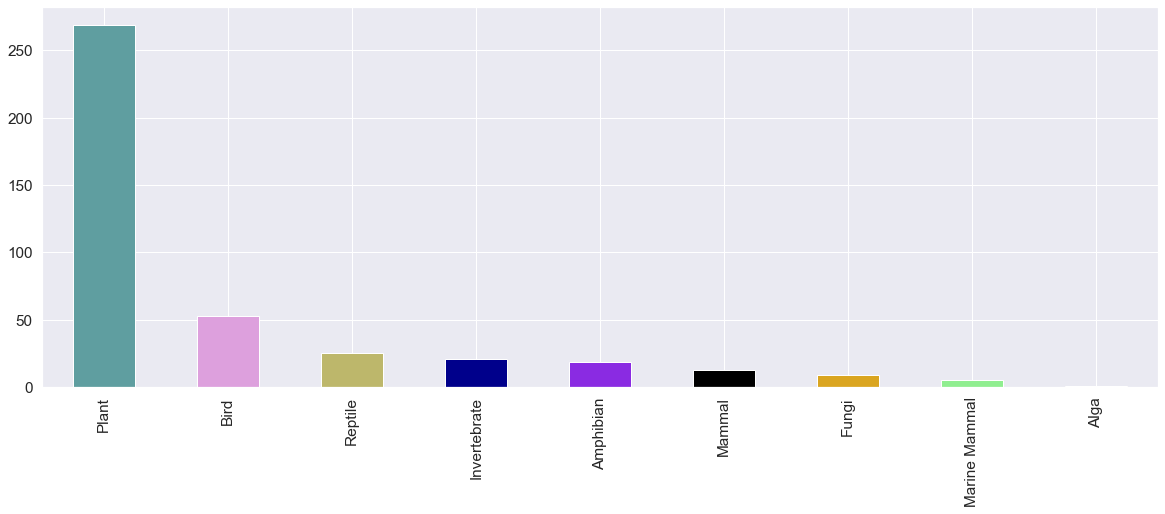

In [104]:
b = df["Type_of_Species/Ecological_Community_(For_analyses)"]
plt.figure(figsize=(20,7))
colors = ['cadetblue', 'plum', 'darkkhaki', 'darkblue', 'blueviolet', 'black', 'goldenrod', 'lightgreen', 'tan']
b.value_counts().plot(kind="bar", color=colors)

In [28]:
df["Type_of_Species/Ecological_Community_(For_analyses)"].value_counts()


Plant            269
Bird              53
Reptile           25
Invertebrate      21
Amphibian         19
Mammal            13
Fungi              9
Marine Mammal      5
Alga               1
Name: Type_of_Species/Ecological_Community_(For_analyses), dtype: int64

Text(0.5, 1, 'Count of Species Listed')

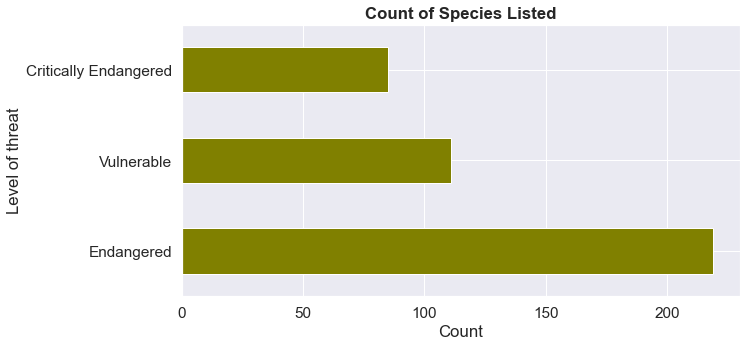

In [36]:
sns.set(font_scale=1.4)
colors = 'olive'
a = df["Level_of_threat"].value_counts()
a.plot(kind='barh', figsize=(10,5), rot=0, color=colors)
plt.xlabel("Count")
plt.ylabel("Level of threat")
plt.title("Count of Species Listed", y=1, fontweight='bold')

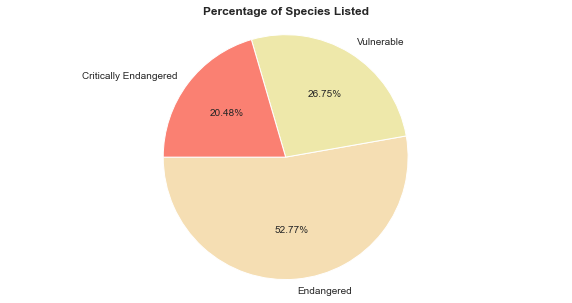

In [35]:
c_labels = ['Endangered', 'Vulnerable', 'Critically Endangered']
c_sizes = [219, 111, 85]
c_colors = ['wheat', 'palegoldenrod', 'salmon']

plt.pie(c_sizes, labels=c_labels, colors=c_colors, autopct='%1.2f%%', startangle=180, textprops={'fontsize': 10})
plt.axis('equal')
plt.title('Percentage of Species Listed', fontweight='bold')
plt.show()

In [14]:
above_endangered.shape

(85, 199)

In [15]:
np.where(df["Level_of_threat"] == 'Critically Endangered')

(array([ 13,  14,  19,  33,  34,  44,  50,  58,  59,  64,  66,  87,  97,
        120, 125, 129, 136, 141, 142, 151, 158, 160, 161, 167, 171, 172,
        173, 176, 177, 179, 181, 183, 186, 187, 193, 199, 200, 217, 221,
        227, 235, 238, 239, 246, 265, 267, 269, 272, 283, 294, 302, 319,
        321, 322, 325, 326, 327, 328, 329, 330, 332, 333, 335, 338, 339,
        341, 342, 345, 346, 352, 356, 358, 359, 360, 364, 388, 389, 390,
        392, 396, 404, 409, 410, 412, 414], dtype=int64),)

In [16]:
dfc = df.loc[(df["Level_of_threat"] == 'Critically Endangered'), ['Name','Level_of_threat']]
dfc.head()

,Name,Level_of_threat
13,"Amytornis modestus inexpectatus (Mathews, 1912)",Critically Endangered
14,"Amytornis modestus obscurior (Mathews, 1923)",Critically Endangered
19,"Anthochaera phrygia (Shaw, 1794)",Critically Endangered
33,Banksia conferta A.S. George subsp. conferta,Critically Endangered
34,Banksia vincentia Stimpson & P.H.Weston\n,Critically Endangered


In [17]:
dfc.shape

(85, 2)

In [18]:
cclt= df.loc[df['Climate_Change_listed_as_a_threat?'] == 'Yes', ['Name', 'Level_of_threat', 'Climate_Change_listed_as_a_threat?']]
cclt.head()

,Name,Level_of_threat,Climate_Change_listed_as_a_threat?
18,"Antechinus arktos Baker, Mutton, Hines & Van D...",Endangered,Yes
19,"Anthochaera phrygia (Shaw, 1794)",Critically Endangered,Yes
32,"Balaenoptera musculus (Linnaeus, 1758)",Endangered,Yes
45,"Botaurus poiciloptilus (Wagler, 1827)",Endangered,Yes
52,Caladenia montana G.W.Carr,Vulnerable,Yes


In [19]:
mlc = pd.merge(dfc, cclt, how='left')
mlc.head(3)

,Name,Level_of_threat,Climate_Change_listed_as_a_threat?
0,"Amytornis modestus inexpectatus (Mathews, 1912)",Critically Endangered,NaN
1,"Amytornis modestus obscurior (Mathews, 1923)",Critically Endangered,NaN
2,"Anthochaera phrygia (Shaw, 1794)",Critically Endangered,Yes


In [21]:
np.where(mlc['Climate_Change_listed_as_a_threat?'] == 'Yes')

(array([ 2,  8, 27, 28, 39, 47, 53, 54, 58, 59, 67, 68, 70, 76, 82, 83],
       dtype=int64),)

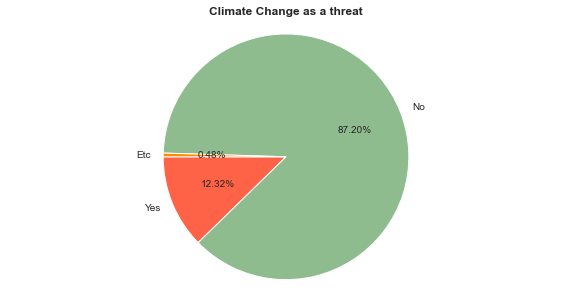

In [26]:
c_labels = ['Yes', 'No', 'Etc']
# "Climate_Change_listed_as_a_threat?"
c_sizes = [51, 361, 2]
c_colors = ['tomato', 'darkseagreen', 'darkorange']

plt.pie(c_sizes, labels=c_labels, colors=c_colors, autopct='%1.2f%%', startangle=180, textprops={'fontsize': 10})
plt.axis('equal')
plt.title('Climate Change as a threat', fontweight='bold')
plt.show()

In [20]:
oooo = mlc.loc[mlc['Climate_Change_listed_as_a_threat?'] == 'Yes']
oooo.head()

,Name,Level_of_threat,Climate_Change_listed_as_a_threat?
2,"Anthochaera phrygia (Shaw, 1794)",Critically Endangered,Yes
8,Callistemon purpurascens S.M.Douglas & S.David,Critically Endangered,Yes
27,Gentiana bredboensis L.G. Adams,Critically Endangered,Yes
28,Gentiana wingecarribiensis L. Adams,Critically Endangered,Yes
39,Lepidorrhachis mooreana (F. Muell.) O.F.Cook,Critically Endangered,Yes


In [22]:
oooo.value_counts()

Name                                                Level_of_threat        Climate_Change_listed_as_a_threat?
Anthochaera phrygia (Shaw, 1794)                    Critically Endangered  Yes                                   1
Callistemon purpurascens S.M.Douglas & S.David      Critically Endangered  Yes                                   1
Gentiana bredboensis L.G. Adams                     Critically Endangered  Yes                                   1
Gentiana wingecarribiensis L. Adams                 Critically Endangered  Yes                                   1
Lepidorrhachis mooreana (F. Muell.) O.F.Cook        Critically Endangered  Yes                                   1
Neophema chrysogaster (Latham, 1790)                Critically Endangered  Yes                                   1
Pomaderris walshii J.C. Millott & K.L. McDougall    Critically Endangered  Yes                                   1
Potorous longipes Seebeck & Johnston, 1980          Critically Endangered  Yes       

In [23]:
oooo.shape

(16, 3)

In [24]:
df['Type_of_Climate_Change_threat'].value_counts()

Climate Change                                                                                                                                                                                                                                                                                                                                     6
Mountain ecosystem                                                                                                                                                                                                                                                                                                                                 4
Changes to extent of preferred habitat (habitat loss)                                                                                                                                                                                                                                                                         

In [25]:
df["Climate_Change_listed_as_a_threat?"].value_counts()

No      361
Yes      50
Yes?      2
Yes       1
Name: Climate_Change_listed_as_a_threat?, dtype: int64

In [29]:
import seaborn as sns

sns.set_theme(style="ticks", color_codes=True)

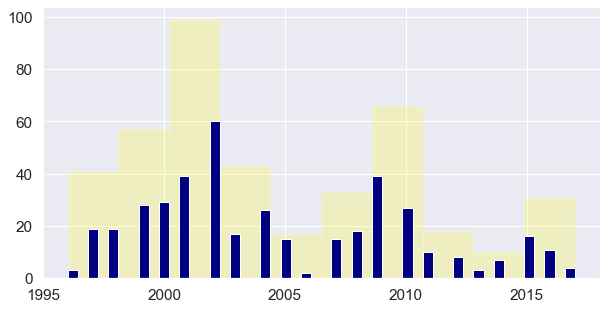

In [98]:
capped_Year_listed_data = df["Year_listed"][df["Year_listed"] < 2018]

plt.hist(capped_Year_listed_data, bins=10, facecolor='yellow', alpha=0.2)
plt.hist(capped_Year_listed_data, bins=50, facecolor='navy', alpha=1)
plt.show()


In [140]:
def distribution():
    lower_bound = 1995
    upper_bound = 2020

    plt.figure(figsize=(20,10))
    plt.hist(df["Year_listed"], bins=50, range=(lower_bound, upper_bound), facecolor='indianred', alpha=0.8)
    plt.title("The distribution of species listed as threatened", fontsize=30, fontweight='bold')
    plt.xlabel('Listed year', fontsize=20)
    plt.ylabel('The number of species', fontsize=20)
    plt.grid(True)
    plt.show()


In [33]:
from shapely.geometry import Point

In [34]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


shp_file_name = "NSW_LOC_POLYGON_shp.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset/"
    "91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
    "5e295412-357c-49a2-98d5-6caf099c2339/download/"
    "nsw_locality_polygon_shp.zip")

In [35]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [36]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [37]:
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done!")

loading from file
done!


In [57]:
fp = "NSW_LOC_POLYGON_shp.shp"
map_df = gp.read_file(fp)

<AxesSubplot:>

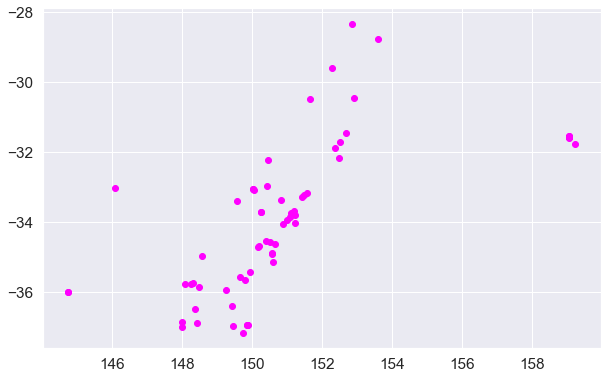

In [55]:
cep.plot(color='magenta', figsize=(10,10))

In [29]:
habitat = df['Habitat_(Detailed)']
habitat.head()

NameError: name 'df' is not defined

<AxesSubplot:>

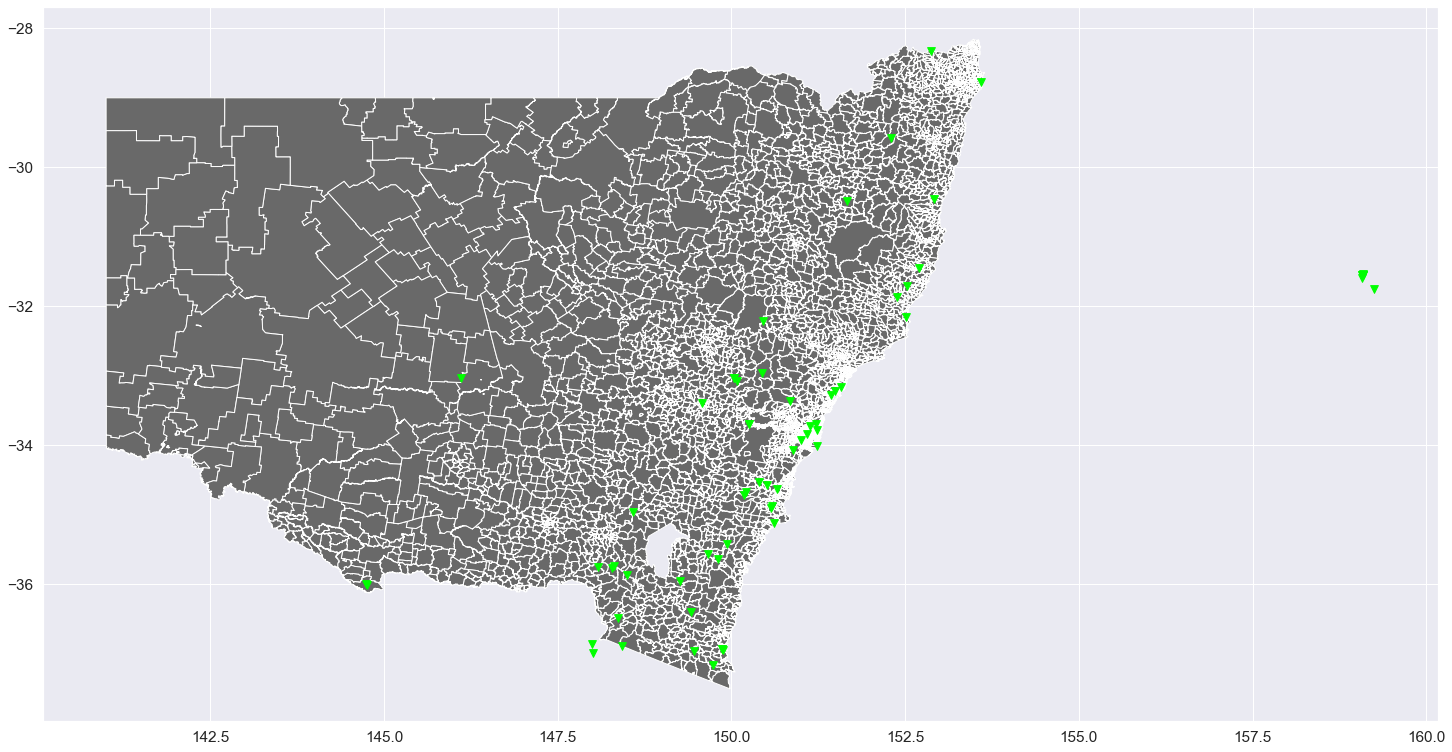

In [137]:
fig, ax = plt.subplots(figsize=(25,20))
ax.set_aspect('equal')
map_df.plot(ax=ax, color='dimgray')
cep.plot(ax=ax, marker="v", color='lime', markersize=60)

In [38]:
suburbs = gp.GeoDataFrame.from_file(shp_file_name)


In [39]:
def add_centroid(row):
    return row.geometry.centroid

suburbs["centroid"] = suburbs.apply(add_centroid, axis=1)

suburbs.sample(2)

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,NSW_LOCALI,NSW_LOCA_1,NSW_LOCA_2,NSW_LOCA_3,NSW_LOCA_4,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry,centroid
992,37130,2021-02-09,None,NSW3526,2017-02-02,None,SAUMAREZ,None,None,G,None,1,"POLYGON ((151.60206 -30.56634, 151.60201 -30.5...",POINT (151.5893680772648 -30.57627248023425)
445,35686,2021-02-09,None,NSW2483,2015-11-10,None,MALUA BAY,None,None,G,None,1,"POLYGON ((150.23311 -35.78129, 150.23314 -35.7...",POINT (150.2116566836222 -35.79074861381305)


In [40]:
dir(suburbs.iloc[0].centroid)

['__and__',
 '__array_interface__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__geom__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_crs',
 '_ctypes_data',
 '_geom',
 '_get_coords',
 '_is_empty',
 '_lgeos',
 '_ndim',
 '_other_owned',
 '_repr_svg_',
 '_set_coords',
 'almost_equals',
 'area',
 'array_interface',
 'array_interface_base',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'convex_hull',
 'coords',
 'covers',
 'crosses',
 'ctypes',
 'difference',
 'disjoint',
 'distance',
 'empty',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'has_z',
 'hausdorff_distance',


In [41]:
crs = ['init', 'epsg:8021']

In [42]:
df_c = pd.read_csv('cel.csv')
df_c.head()

,number,longitude,latitude,location
0,15.0,150.033599,-33.035650,Capertee Valley
1,16.0,150.033599,-33.035650,Capertee Valley
2,35.0,152.526677,-31.713557,Coorabakh National Park
3,36.0,150.563803,-34.898142,Shoalhaven LGA
4,52.0,149.578211,-33.396855,Bathurst


In [43]:
geometry = gp.points_from_xy(df_c.longitude, df_c.latitude)

In [44]:
lii = df_c.loc[(df_c['location'] == 'Lord Howe Island'), ['longitude', 'latitude']]
lii.head()

,longitude,latitude
7,159.081362,-31.549198
11,159.251304,-31.753351
12,159.083422,-31.547735
26,159.080676,-31.550369
29,159.073669,-31.587773


In [45]:
lii.shape

(8, 2)

In [46]:
liip = gp.points_from_xy(lii.longitude, lii.latitude)

In [47]:
celii = gp.GeoDataFrame(lii, crs=crs, geometry=liip)

<AxesSubplot:>

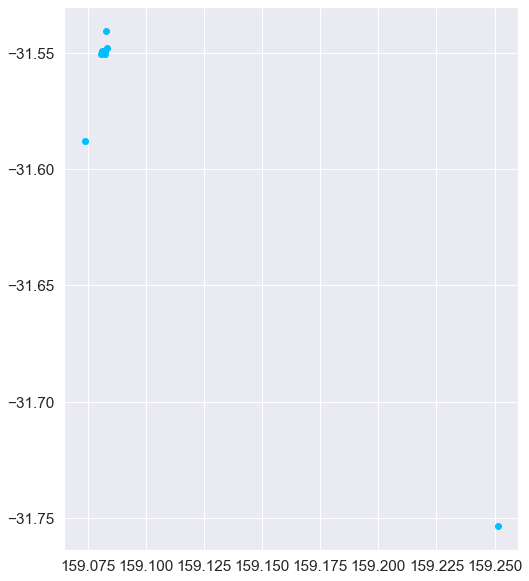

In [131]:
celii.plot(color='deepskyblue', figsize=(10,10))

In [49]:
ce_here = shapely.geometry.point.Point(159.073668632338, -31.58777270249)
suburbs['location_of_ce'] = suburbs.centroid.distance(ce_here)

Text(0.5, 1.0, 'Distribution')

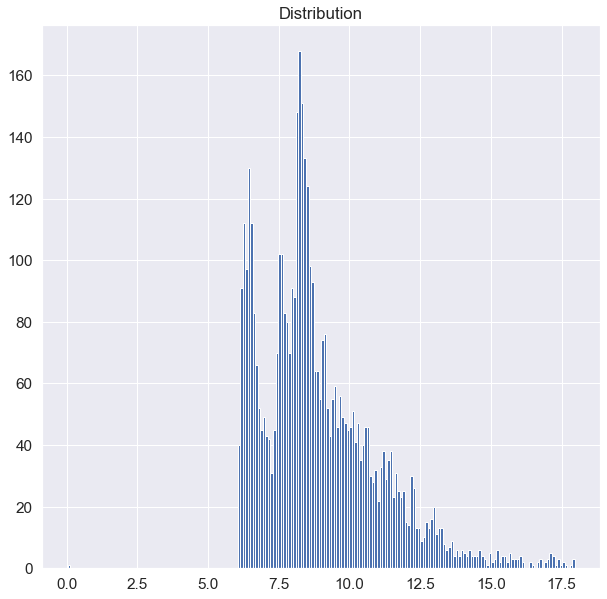

In [50]:
suburbs.location_of_ce.hist(bins=200, figsize=(10,10))
plt.title("Distribution")

<AxesSubplot:>

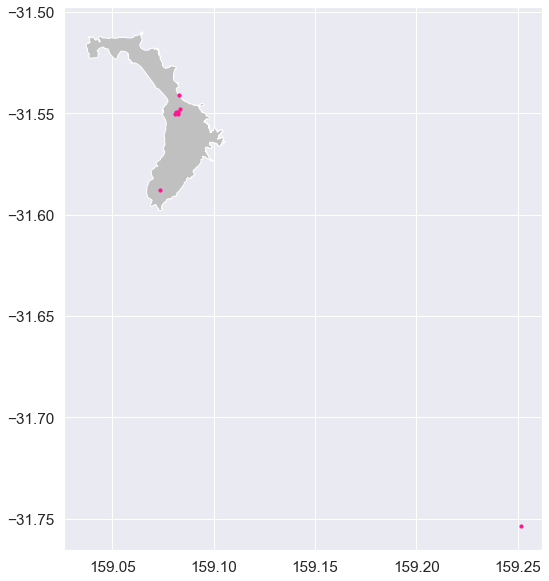

In [122]:
close_burbs = suburbs[suburbs.location_of_ce < 1]
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
close_burbs.plot(ax=ax, color='silver')
celii.plot(ax=ax, marker='o', color='deeppink', markersize=10)

In [52]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)

In [53]:
cep = gp.GeoDataFrame(df_c, crs=crs, geometry=geometry)

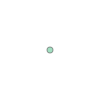

In [54]:
geometry[0]

In [30]:
suburbs.shape

(4593, 14)

In [31]:
suburbs.head(2)

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,NSW_LOCALI,NSW_LOCA_1,NSW_LOCA_2,NSW_LOCA_3,NSW_LOCA_4,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry,centroid
0,34943,2021-02-09,None,NSW3128,2018-08-08,None,ORTON PARK,None,None,G,None,1,"POLYGON ((149.55618 -33.46707, 149.55619 -33.4...",POINT (149.5729917188781 -33.46852327089563)
1,34946,2021-02-09,None,NSW311,2017-08-10,None,BEROWRA HEIGHTS,None,None,G,None,1,"POLYGON ((151.13409 -33.61867, 151.13392 -33.6...",POINT (151.1356292367305 -33.60389471046001)


LC_PLY_PID                                                36406
DT_CREATE                                            2021-02-09
DT_RETIRE                                                  None
LOC_PID                                                 NSW2220
NSW_LOCALI                                           2016-11-11
NSW_LOCA_1                                                 None
NSW_LOCA_2                                               KORORA
NSW_LOCA_3                                                 None
NSW_LOCA_4                                                 None
NSW_LOCA_5                                                    G
NSW_LOCA_6                                                 None
NSW_LOCA_7                                                    1
geometry      POLYGON ((153.14293331 -30.24986448, 153.14292...
centroid           POINT (153.1168026175277 -30.24955973016186)
Name: 4592, dtype: object


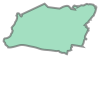

In [32]:
a = suburbs.iloc[4592]
print(a)
a.geometry

In [33]:
suburbs["lat"] = suburbs.centroid.apply(lambda p: p.x)
suburbs.head(2)

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,NSW_LOCALI,NSW_LOCA_1,NSW_LOCA_2,NSW_LOCA_3,NSW_LOCA_4,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry,centroid,lat
0,34943,2021-02-09,None,NSW3128,2018-08-08,None,ORTON PARK,None,None,G,None,1,"POLYGON ((149.55618 -33.46707, 149.55619 -33.4...",POINT (149.5729917188781 -33.46852327089563),149.572992
1,34946,2021-02-09,None,NSW311,2017-08-10,None,BEROWRA HEIGHTS,None,None,G,None,1,"POLYGON ((151.13409 -33.61867, 151.13392 -33.6...",POINT (151.1356292367305 -33.60389471046001),151.135629


In [34]:
suburbs["lat"] = suburbs.centroid.apply(lambda p: p.x)
idx = suburbs.lat.idxmax()
suburbs.loc[idx]

LC_PLY_PID                                                35359
DT_CREATE                                            2021-02-09
DT_RETIRE                                                  None
LOC_PID                                                 NSW2411
NSW_LOCALI                                           2012-10-30
NSW_LOCA_1                                                 None
NSW_LOCA_2                                     LORD HOWE ISLAND
NSW_LOCA_3                                                 None
NSW_LOCA_4                                                 None
NSW_LOCA_5                                                    G
NSW_LOCA_6                                                 None
NSW_LOCA_7                                                    1
geometry      POLYGON ((159.06471344 -31.50981902, 159.06475...
centroid           POINT (159.0768394602908 -31.55334447394493)
lat                                                  159.076839
Name: 4480, dtype: object

In [35]:
suburbs["lat"] = suburbs.centroid.apply(lambda p: p.x)
idx = suburbs.lat.idxmax()
suburbs.loc[idx]

LC_PLY_PID                                                35359
DT_CREATE                                            2021-02-09
DT_RETIRE                                                  None
LOC_PID                                                 NSW2411
NSW_LOCALI                                           2012-10-30
NSW_LOCA_1                                                 None
NSW_LOCA_2                                     LORD HOWE ISLAND
NSW_LOCA_3                                                 None
NSW_LOCA_4                                                 None
NSW_LOCA_5                                                    G
NSW_LOCA_6                                                 None
NSW_LOCA_7                                                    1
geometry      POLYGON ((159.06471344 -31.50981902, 159.06475...
centroid           POINT (159.0768394602908 -31.55334447394493)
lat                                                  159.076839
Name: 4480, dtype: object

## In Conclusion:
* Lesislation of the Conservation ACT might have affected to the recording of threatened species.
* Approximately 12 percent of threatened species is documented due to climate change.
* Habitats of threatened species are largely located in seasides of NSW.
* There are variety of endemic species in Lord Howe Island due to its unique water surrounding.